In [ ]:
!git clone 'https://github.com/dphi-official/Datasets/'

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


In [ ]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_df.head()


,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
image_paths = ['/content/train_beg/' + fname for fname in train_df['filename']]

In [ ]:
if len(image_paths)==len(train_df):
  print("The number of images i.e",len(image_paths),"matches the number of filepaths i.e",len(train_df))
else:
  print("The numbers doesn't match")

The number of images i.e 1200 matches the number of filepaths i.e 1200


In [ ]:
train_data = pd.DataFrame({'filename': train_df['filename'], 'filepath': image_paths, 'animal_type': train_df['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


In [ ]:
len(train_data)

1200

In [ ]:
print(train_data.iloc[420])

filename                          Image_421.jpg
filepath       /content/train_beg/Image_421.jpg
animal_type                               mucca
Name: 420, dtype: object


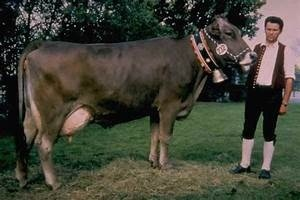

mucca


In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/train_beg/Image_421.jpg",cv2.IMREAD_COLOR)
cv2_imshow(image)
print(train_data.animal_type[420])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
data = []
labels =[]
for i in range(len(train_data)):
  img_array = cv2.imread(train_data.filepath[i],cv2.IMREAD_GRAYSCALE)
  new_img_array = cv2.resize(img_array,dsize=(96,96))
  data.append(new_img_array)
  if train_data.animal_type[i]=="mucca":
    labels.append(0)
  else:
    labels.append(1)

data = np.array(data).reshape(-1,96,96,1)
labels = np.array(labels)

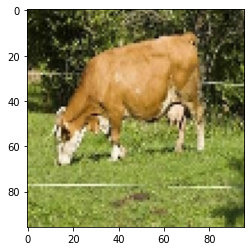

0


In [ ]:
im = cv2.imread(train_data.filepath[421])
im_resized = cv2.resize(im, (96, 96), 1)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()
print(labels[421])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=X_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
    ])


In [ ]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 0s 12ms/step - loss: 0.6901 - accuracy: 0.5651 - val_loss: 0.6787 - val_accuracy: 0.5729
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.7166 - accuracy: 0.5807 - val_loss: 0.6838 - val_accuracy: 0.5417
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6582 - accuracy: 0.5977 - val_loss: 0.7001 - val_accuracy: 0.5729
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6767 - accuracy: 0.5820 - val_loss: 0.6759 - val_accuracy: 0.5625
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.5781 - val_loss: 0.6720 - val_accuracy: 0.5781
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6546 - accuracy: 0.5924 - val_loss: 0.7708 - val_accuracy: 0.5417
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6244 - accuracy: 0.6172 - val_loss: 0.6784 - val_accuracy: 0.5833
Epoch 8/100


In [ ]:
pred = model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.4262 - accuracy: 0.6625


In [ ]:
# Get the csv file given 'Testing_set_animals.csv'
test_image_ids = pd.read_csv("/content/Datasets/animal_data/Testing_set_animals.csv", names = ['filename'])  # there is no header in the csv file so we need to provide it. You can also do header = None
test_image_ids.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
image_paths = ['/content/test_beg/' + fname for fname in test_image_ids['filename']]
image_paths

In [ ]:
test_data = pd.DataFrame({'filename': test_image_ids.filename, 'filepath': image_paths})
test_data.head()

,filename,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


In [ ]:
image_pixels = []
for i in range(len(test_data)):
  img_array = cv2.imread(test_data.filepath[i],cv2.IMREAD_GRAYSCALE)
  new_img_array = cv2.resize(img_array,dsize=(96,96))
  image_pixels.append(new_img_array)
image_pixels = np.array(data).reshape(-1,96,96,1)
image_pixels = image_pixels/255.0

In [ ]:
preds = model.predict(image_pixels)

In [ ]:
predicted_val = np.round(preds)

In [ ]:
pred_val_name=[]

x = 0
for x in range(len(predicted_val)):
    if predicted_val[x] == 0:
        pred_val_name.append('mucca')
    else:
        pred_val_name.append('pecora')
print(pred_val_name)

['mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 